In [1]:
import string
import random
from PIL import Image, ImageOps, ImageDraw, ImageFont, ImageChops
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from ipywidgets import interactive, HBox, VBox
from img_processing import preprocess_img, DITHER_MODES
from ascii_art_non_mono_utils import *
from ascii_art_non_mono_algorithms import *

In [2]:
font_path = "fonts/OpenSans-Regular.ttf"
size = 20
fnt = ImageFont.truetype(font_path, size)

In [3]:
orig_img = Image.open("imgs/irad_grad.bmp").convert("L")
#orig_img = ImageOps.invert(orig_img)

print(orig_img.size)

(512, 512)


In [4]:
def i_preprocess_img(scale_factor, contrast, brightness, quantize_colors, eq, dither):
    proc_img = preprocess_img(orig_img, 0.3, 1.1, 0.9, 0.2, 128, DITHER_MODES.NONE)
    plt.imshow(proc_img, cmap='gray', vmin=0, vmax=255, interpolation='none')

    plt.figure(figsize=(9, 3))
    plt.xticks([x for x in range(0, len(proc_img.histogram()), 25)])
    plt.bar([x for x in range(0, len(proc_img.histogram()))], proc_img.histogram())
    plt.grid()
    plt.show()

    return proc_img

interactive_preprocess = interactive(i_preprocess_img,
            scale_factor=(0.01, 1, 0.01),
            contrast=(0, 2, 0.01),
            brightness=(0, 2, 0.01),
            eq=(0, 1, 0.01),
            quantize_colors=(1, 256, 1),
            dither=DITHER_MODES)

controls = VBox(interactive_preprocess.children[:-1])
display(HBox((controls, interactive_preprocess.children[-1])))

In [5]:
proc_img = interactive_preprocess.result

In [6]:
palette = list(filter(lambda a: a.isprintable(), string.printable))
print(len(palette))
print(palette)

95
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ']


-57.49198853094957


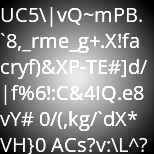

In [7]:
lrs = lazy_random_search(proc_img, palette, fnt)

for i in range(0, 100):
    text = next(lrs)
    if i % 100 == 0:
        print(evaluate_text_arr(text, proc_img, fnt))

bg_img, draw = new_img_draw(proc_img.size)
draw.multiline_text((0,0), ''.join(text), font=fnt, fill=255)
ImageChops.add(proc_img, bg_img)

                              
          .j@jjjj,          
         @@@jj        
         @@@l         
            "Tll`           
                              

-43.78938269522685


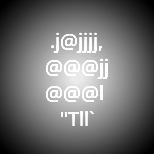

In [8]:
text = greedy_algorithm(proc_img, palette, fnt)

print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw.multiline_text((0,0), ''.join(text), font=fnt, fill=255)
print(evaluate_text_arr(text, proc_img, fnt))
ImageChops.add(proc_img, bg_img)

In [9]:
lines = split_lines(proc_img, palette, fnt)
line = lines[len(lines)//2]

pop, fits = generate_harmony_line(line, palette, fnt, 1000000, 20)
print(fits)

-51.844935064935065 -50.27003896103896
-45.508311688311686 -44.94341558441558
-44.66285714285714 -44.26170129870129
-44.388051948051945 -43.984233766233764
-44.044675324675325 -43.6734935064935
-43.78779220779221 -43.418688311688314
-43.644675324675326 -43.33725974025974
-43.55662337662338 -43.24441558441559
-43.43948051948052 -43.12397402597403
-43.412207792207795 -43.107402597402604
-43.36207792207792 -43.07687012987013
-43.35324675324675 -43.06531168831169
-43.32597402597403 -43.0258961038961
-43.27194805194805 -42.96827272727273
-43.23116883116883 -42.92388311688312
-43.13090909090909 -42.86509090909092
-43.05168831168831 -42.79951948051948
-42.984935064935065 -42.744376623376624
-42.9612987012987 -42.721
-42.94441558441559 -42.71324675324676
-42.90675324675325 -42.6748051948052
-42.86025974025974 -42.65520779220779
-42.86025974025974 -42.65520779220779
-42.833246753246755 -42.60538961038962
-42.82909090909091 -42.60124675324676
-42.81012987012987 -42.57659740259741
-42.80207792207

In [13]:
print(pop[0])
text = palette_id_arr_to_text_arr(pop[0], palette)
bg_img, draw = new_img_draw(line.size)
draw.text((0,0), ''.join(text), font=fnt, fill=255)
print(evaluate_text_arr(text, line, fnt))
ImageChops.add(line, bg_img)

[94, 94, 94, 94, 94, 94, 94, 94, 93, 82, 8, 83, 21, 19, 68, 94, 94, 94, 94, 94, 94, 94]
-40.98
